This Jupyter Notebook works to analyze Loan Defaults. Text, or markdown, cells will precede and explain cells where code is written.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

Models 4 and 5 towards the bottom of this notebook are my final models.

Import loan data into a pandas dataframe and output it.

In [3]:
df = pd.read_csv('loan_data 2024.csv')             
df

,default,fico,dti,accts_open_past_24mths,accts_open_past_12mths,bc_credit_util,inq_past_6mths,num_bankruptcies,num_delinq_past_24mths,num_mnths_rcnt_acct,num_mort_accts,total_num_accts,total_num_open_accts,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,0,682.0,4.37,3,1,0.0,0,1,0,9,2,24,5,NaN,NaN,NaN,NaN,NaN
1,0,682.0,25.20,10,3,71.0,3,0,0,4,0,25,14,NaN,NaN,NaN,NaN,NaN
2,0,672.0,11.97,5,3,79.9,0,0,0,7,1,24,20,NaN,NaN,NaN,NaN,NaN
3,0,662.0,15.00,14,6,61.2,1,1,0,4,3,46,18,NaN,NaN,NaN,NaN,NaN
4,0,722.0,26.80,1,0,91.6,0,0,0,23,0,14,7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59306,0,19.0,12.72,1,0,95.1,0,0,0,14,0,7,6,NaN,NaN,NaN,NaN,NaN
59307,0,722.0,22.39,3,2,75.3,0,0,0,5,4,27,13,NaN,NaN,NaN,NaN,NaN
59308,0,662.0,NaN,16,4,79.0,2,1,2,5,1,50,32,NaN,NaN,NaN,NaN,NaN
59309,0,888.0,16.50,3,1,98.2,1,0,0,4,5,28,8,NaN,NaN,NaN,NaN,NaN


1. Exploratory Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59311 entries, 0 to 59310
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   default                 59311 non-null  int64  
 1   fico                    59311 non-null  float64
 2   dti                     58970 non-null  float64
 3   accts_open_past_24mths  59311 non-null  int64  
 4   accts_open_past_12mths  59311 non-null  int64  
 5   bc_credit_util          59311 non-null  float64
 6   inq_past_6mths          59311 non-null  int64  
 7   num_bankruptcies        59311 non-null  int64  
 8   num_delinq_past_24mths  59311 non-null  int64  
 9   num_mnths_rcnt_acct     59311 non-null  int64  
 10  num_mort_accts          59311 non-null  int64  
 11  total_num_accts         59311 non-null  int64  
 12  total_num_open_accts    59311 non-null  int64  
 13  Unnamed: 13             0 non-null      float64
 14  Unnamed: 14             0 non-null    

In [5]:
df.describe()

,default,fico,dti,accts_open_past_24mths,accts_open_past_12mths,bc_credit_util,inq_past_6mths,num_bankruptcies,num_delinq_past_24mths,num_mnths_rcnt_acct,num_mort_accts,total_num_accts,total_num_open_accts,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,59311.000000,59311.000000,58970.000000,59311.000000,59311.000000,59311.000000,59311.000000,59311.000000,59311.000000,59311.000000,59311.000000,59311.000000,59311.000000,0.0,0.0,0.0,1.0,16.000000
mean,0.122507,677.825336,20.226877,4.742240,2.161909,65.826290,0.554501,0.113638,0.341269,8.019440,1.856199,27.342483,12.527390,NaN,NaN,NaN,5931.0,0.401290
std,0.327873,129.806304,8.513542,3.188316,1.817227,26.618656,0.846264,0.354561,0.921587,9.064289,1.748697,12.065068,5.682164,NaN,NaN,NaN,NaN,0.263867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,NaN,NaN,NaN,5931.0,0.011898
25%,0.000000,672.000000,13.870000,2.000000,1.000000,47.100000,0.000000,0.000000,0.000000,3.000000,0.000000,19.000000,9.000000,NaN,NaN,NaN,5931.0,0.224398
50%,0.000000,687.000000,19.770000,4.000000,2.000000,70.700000,0.000000,0.000000,0.000000,6.000000,1.000000,26.000000,12.000000,NaN,NaN,NaN,5931.0,0.398634
75%,0.000000,712.000000,26.370000,6.000000,3.000000,88.900000,1.000000,0.000000,0.000000,10.000000,3.000000,34.000000,15.000000,NaN,NaN,NaN,5931.0,0.539016
max,1.000000,900.000000,39.990000,35.000000,22.000000,171.100000,6.000000,9.000000,39.000000,236.000000,5.000000,124.000000,90.000000,NaN,NaN,NaN,5931.0,0.896838


In [6]:
df.isnull().sum()

default                       0
fico                          0
dti                         341
accts_open_past_24mths        0
accts_open_past_12mths        0
bc_credit_util                0
inq_past_6mths                0
num_bankruptcies              0
num_delinq_past_24mths        0
num_mnths_rcnt_acct           0
num_mort_accts                0
total_num_accts               0
total_num_open_accts          0
Unnamed: 13               59311
Unnamed: 14               59311
Unnamed: 15               59311
Unnamed: 16               59310
Unnamed: 17               59295
dtype: int64

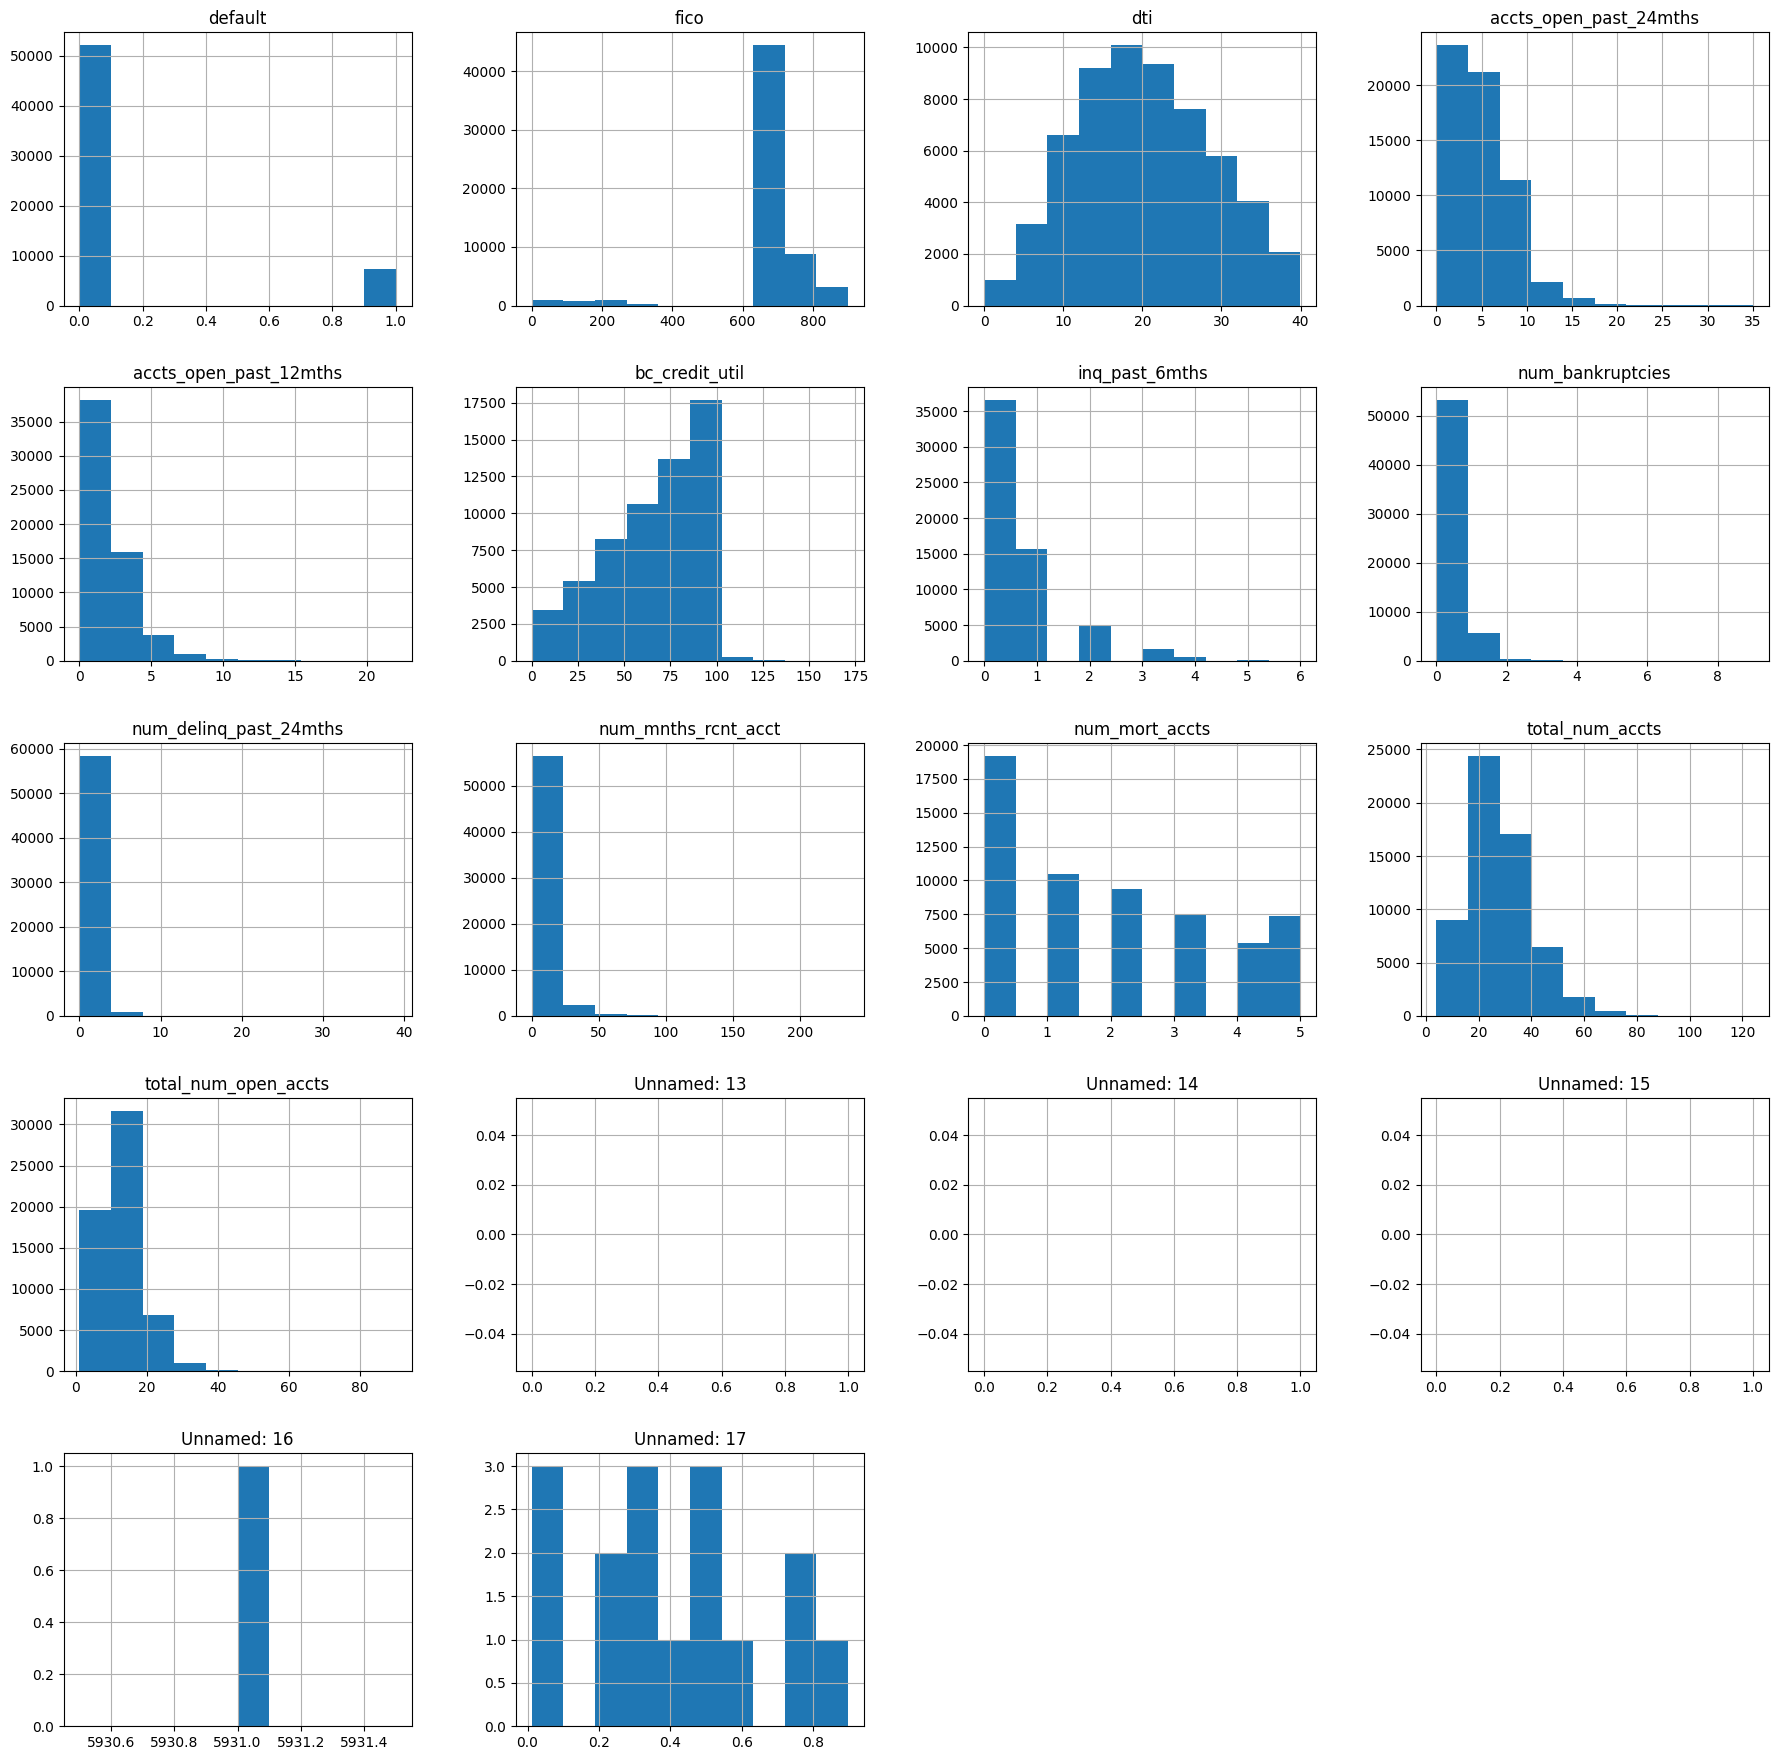

In [7]:
df.hist(figsize = (22, 22))
plt.show()

Unnamed variables 13,14,15,16 are useless. Check to see if variable 17 is correlated with defaulting. Otherwise, drop it.

In [8]:
df['Unnamed: 17'].corr(df['default'])

0.12237198067113368

I've concluded that it's safe to clean data by removing unnamed variables 13 through 17.

In [9]:
df.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'], axis=1, inplace=True)

Checking to see how many loans are defaulted, and what percent of the total loans taken that makes up.

There are 341 null dti values which will need to be dealt with before building a model. I will replace missing, or NaN, values with the median dti score.

In [11]:
df.loc[ df['dti'].isna(), 'dti'] = df['dti'].median()

Data has been cleaned. Now looking to understand how many loans are defaulted.

In [12]:
df['default'].value_counts()

default
0    52045
1     7266
Name: count, dtype: int64

In [13]:
'% of loans defaulted', df['default'].mean() * 100

('% of loans defaulted', 12.250678626224477)

Check correlations between various variables and defaulting.

In [14]:
df.corr()

,default,fico,dti,accts_open_past_24mths,accts_open_past_12mths,bc_credit_util,inq_past_6mths,num_bankruptcies,num_delinq_past_24mths,num_mnths_rcnt_acct,num_mort_accts,total_num_accts,total_num_open_accts
default,1.000000,-0.038114,0.040470,-0.008647,0.000016,0.192608,0.030322,0.189606,0.184380,0.013223,-0.042997,-0.024744,-0.051359
fico,-0.038114,1.000000,-0.002506,-0.031840,-0.030465,-0.083208,-0.024534,-0.046416,-0.031400,0.012731,0.012946,-0.002271,0.007037
dti,0.040470,-0.002506,1.000000,0.156622,0.088804,0.183350,0.007280,-0.039561,-0.040871,-0.099022,-0.096801,0.200851,0.279013
accts_open_past_24mths,-0.008647,-0.031840,0.156622,1.000000,0.751482,-0.193249,0.306805,0.156402,-0.063336,-0.447893,0.039941,0.451410,0.484217
accts_open_past_12mths,0.000016,-0.030465,0.088804,0.751482,1.000000,-0.201583,0.361540,0.132979,-0.030567,-0.490845,0.028778,0.351160,0.366861
bc_credit_util,0.192608,-0.083208,0.183350,-0.193249,-0.201583,1.000000,-0.094277,-0.086770,-0.029177,0.130445,-0.018698,-0.135582,-0.133533
inq_past_6mths,0.030322,-0.024534,0.007280,0.306805,0.361540,-0.094277,1.000000,0.112309,0.018210,-0.223382,0.006874,0.172135,0.170913
num_bankruptcies,0.189606,-0.046416,-0.039561,0.156402,0.132979,-0.086770,0.112309,1.000000,-0.042990,-0.083127,0.017328,0.057453,-0.010985
num_delinq_past_24mths,0.184380,-0.031400,-0.040871,-0.063336,-0.030567,-0.029177,0.018210,-0.042990,1.000000,0.023350,0.069329,0.098741,0.024258
num_mnths_rcnt_acct,0.013223,0.012731,-0.099022,-0.447893,-0.490845,0.130445,-0.223382,-0.083127,0.023350,1.000000,-0.038867,-0.224463,-0.233258


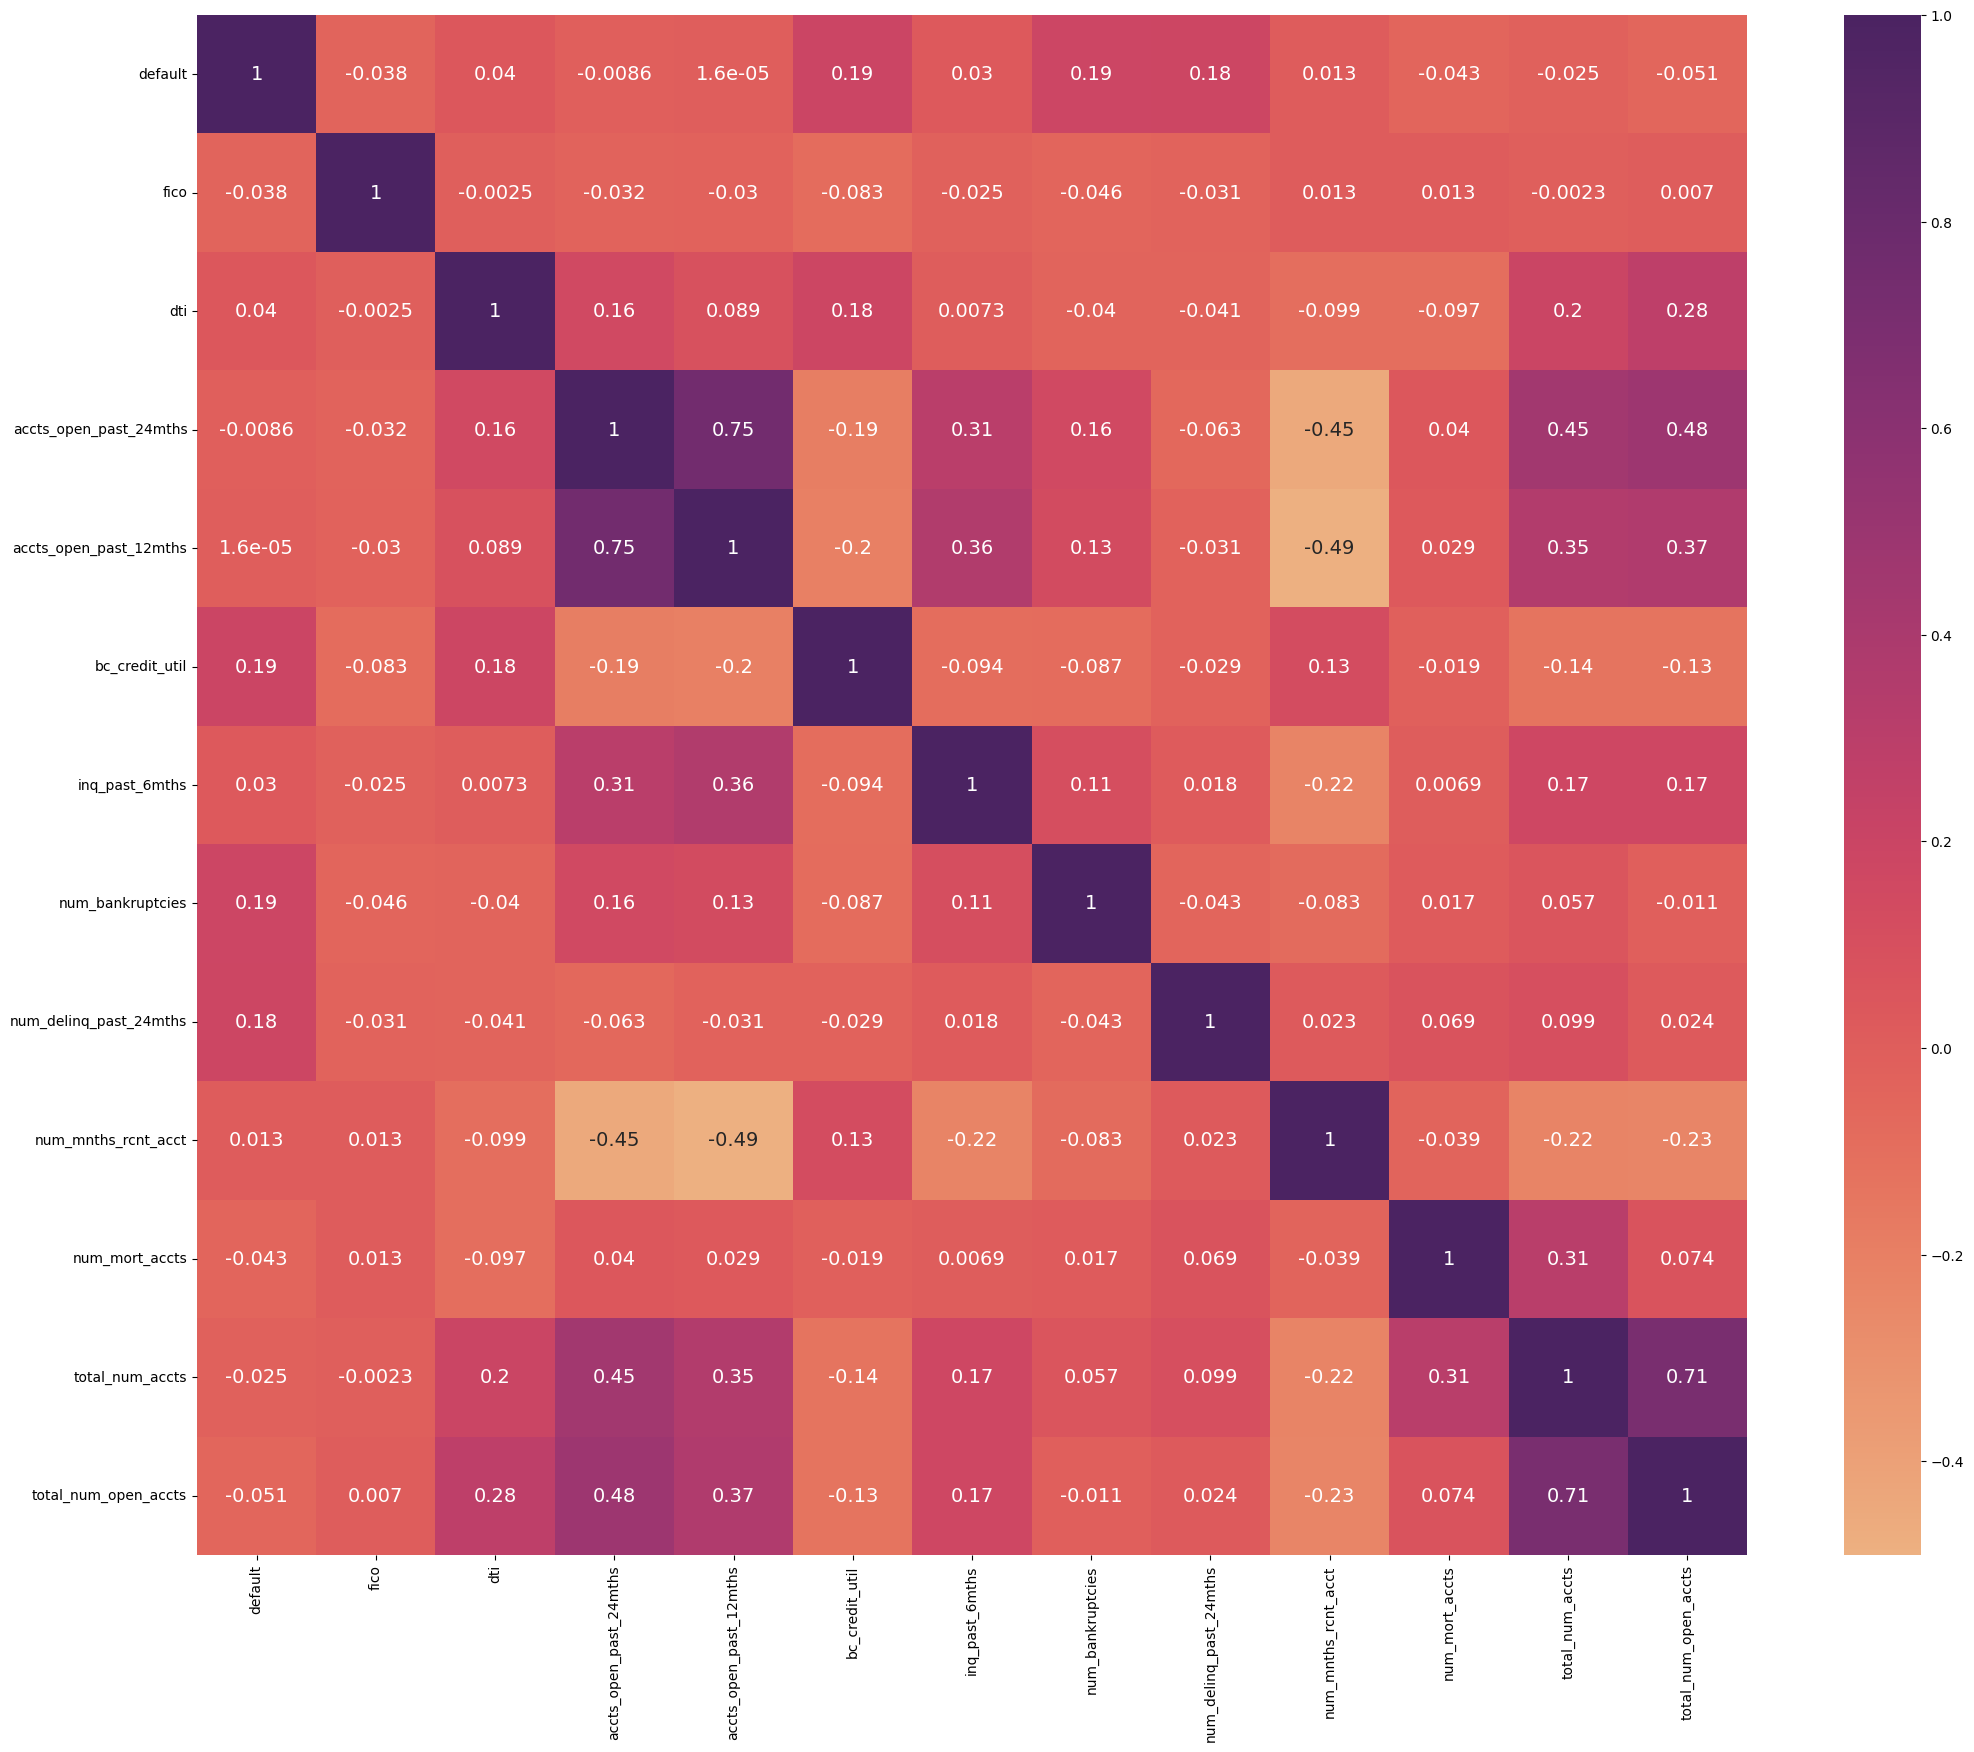

In [15]:
fig, ax = plt.subplots( figsize = (25,20) )
corr_matrix = df.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

Note that we're attempting to correlate continuous variables with the binary/boolean variable of defaulting, which is atypical. At any rate, there were no significant nor surprising correlations. Number of total open accounts and accounts opened in the last 1 or 2 years were unsurprisingly correlated. There appears to not be a strong correlation of default with fico or dti.  Bankruptcies and delinquencies have the greatest R-squared with defaulting. I had previously thought PCA may have been useful here but most correlations are below 0.3 so PCA isn't the best idea. Perhaps in an extension of this project, feature reduction could be utilized for those variables with high correlation only.

Checking to see if there are any variable trends in the datasets when looking at loans that defaulted vs those that did not.

In [16]:
defaulted = df[(df['default'] == 1)]
defaulted.describe()

,default,fico,dti,accts_open_past_24mths,accts_open_past_12mths,bc_credit_util,inq_past_6mths,num_bankruptcies,num_delinq_past_24mths,num_mnths_rcnt_acct,num_mort_accts,total_num_accts,total_num_open_accts
count,7266.0,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000
mean,1.0,664.584366,21.143720,4.668456,2.161987,79.547715,0.623176,0.293559,0.796036,8.340215,1.654968,26.543490,11.746353
std,0.0,126.460808,8.549557,3.249868,1.831601,24.232545,0.906219,0.592083,1.779122,9.860786,1.667222,11.926852,5.186455
min,1.0,0.000000,0.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
25%,1.0,667.000000,14.630000,2.000000,1.000000,67.800000,0.000000,0.000000,0.000000,3.000000,0.000000,18.000000,8.000000
50%,1.0,677.000000,20.830000,4.000000,2.000000,90.200000,0.000000,0.000000,0.000000,6.000000,1.000000,25.000000,11.000000
75%,1.0,692.000000,27.547500,6.000000,3.000000,96.800000,1.000000,0.000000,1.000000,10.000000,3.000000,33.000000,14.000000
max,1.0,900.000000,39.990000,35.000000,16.000000,171.100000,5.000000,9.000000,39.000000,127.000000,5.000000,116.000000,46.000000


In [17]:
nonDefaulted = df[(df['default'] == 0)]
nonDefaulted.describe()

,default,fico,dti,accts_open_past_24mths,accts_open_past_12mths,bc_credit_util,inq_past_6mths,num_bankruptcies,num_delinq_past_24mths,num_mnths_rcnt_acct,num_mort_accts,total_num_accts,total_num_open_accts
count,52045.0,52045.000000,52045.000000,52045.000000,52045.000000,52045.000000,52045.000000,52045.000000,52045.000000,52045.000000,52045.000000,52045.000000,52045.000000
mean,0.0,679.673907,20.095883,4.752541,2.161898,63.910643,0.544913,0.088520,0.277779,7.974657,1.884292,27.454030,12.636430
std,0.0,130.160611,8.472778,3.179523,1.815229,26.373255,0.837113,0.298627,0.702242,8.946639,1.757956,12.080149,5.739568
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
25%,0.0,672.000000,13.810000,2.000000,1.000000,45.300000,0.000000,0.000000,0.000000,3.000000,0.000000,19.000000,9.000000
50%,0.0,692.000000,19.690000,4.000000,2.000000,68.700000,0.000000,0.000000,0.000000,6.000000,2.000000,26.000000,12.000000
75%,0.0,717.000000,26.140000,6.000000,3.000000,86.300000,1.000000,0.000000,0.000000,10.000000,3.000000,34.000000,16.000000
max,0.0,900.000000,39.990000,31.000000,22.000000,128.200000,6.000000,3.000000,10.000000,236.000000,5.000000,124.000000,90.000000


Based off of this data, building a quite robust model may prove difficult since significant trends aren't immediately apparent. However, there are definitely interesting observations to be made. Based off of this 59,000 loan dataset, there is a 100% probability of default if Percentage of total available credit card credit used by the borrower, or bc_credit_util, is over 128.2, recorded bankruptcies areover 3, or delinquencies in past 24 mo is over 10. I will analyze these further below. Also, loans which defaulted are generally associated with lower fico scores.

In [18]:
high_bc_credit_util = df[(df['bc_credit_util'] >= 128.3)]
high_bc_credit_util.describe()

,default,fico,dti,accts_open_past_24mths,accts_open_past_12mths,bc_credit_util,inq_past_6mths,num_bankruptcies,num_delinq_past_24mths,num_mnths_rcnt_acct,num_mort_accts,total_num_accts,total_num_open_accts
count,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.0,692.909091,15.480909,2.909091,1.090909,140.409091,0.545455,0.0,0.090909,10.818182,1.454545,17.818182,7.818182
std,0.0,18.140863,8.613913,2.119177,0.943880,14.432633,0.522233,0.0,0.301511,11.214439,1.572491,6.305841,2.926369
min,1.0,662.000000,4.530000,0.000000,0.000000,128.800000,0.000000,0.0,0.000000,2.000000,0.000000,8.000000,3.000000
25%,1.0,679.500000,8.900000,1.500000,0.500000,130.050000,0.000000,0.0,0.000000,3.500000,0.000000,13.500000,6.000000
50%,1.0,692.000000,16.570000,3.000000,1.000000,133.000000,1.000000,0.0,0.000000,6.000000,1.000000,18.000000,7.000000
75%,1.0,707.000000,20.590000,4.000000,1.500000,145.600000,1.000000,0.0,0.000000,12.000000,2.000000,23.500000,10.000000
max,1.0,722.000000,32.120000,7.000000,3.000000,171.100000,1.000000,0.0,1.000000,36.000000,5.000000,26.000000,12.000000


In [19]:
high_num_bankruptcies = df[(df['num_bankruptcies'] > 3)]
high_num_bankruptcies.describe()

,default,fico,dti,accts_open_past_24mths,accts_open_past_12mths,bc_credit_util,inq_past_6mths,num_bankruptcies,num_delinq_past_24mths,num_mnths_rcnt_acct,num_mort_accts,total_num_accts,total_num_open_accts
count,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.0,596.476190,19.712381,7.714286,3.428571,59.247619,0.809524,4.476190,0.190476,5.285714,1.476190,32.380952,15.047619
std,0.0,193.382165,8.914026,2.883450,1.804756,22.722602,1.030488,1.123345,0.511766,4.349056,1.364516,13.158557,5.499784
min,1.0,39.000000,5.740000,2.000000,0.000000,23.700000,0.000000,4.000000,0.000000,0.000000,0.000000,11.000000,7.000000
25%,1.0,662.000000,14.080000,6.000000,2.000000,39.700000,0.000000,4.000000,0.000000,3.000000,0.000000,22.000000,12.000000
50%,1.0,667.000000,17.890000,8.000000,3.000000,61.700000,1.000000,4.000000,0.000000,4.000000,1.000000,28.000000,14.000000
75%,1.0,672.000000,27.780000,9.000000,5.000000,75.400000,1.000000,5.000000,0.000000,7.000000,2.000000,39.000000,19.000000
max,1.0,707.000000,36.560000,13.000000,6.000000,95.600000,4.000000,9.000000,2.000000,17.000000,5.000000,59.000000,27.000000


In [20]:
high_num_delinq_past_24mths = df[(df['num_delinq_past_24mths'] > 10)]
high_num_delinq_past_24mths.describe()

,default,fico,dti,accts_open_past_24mths,accts_open_past_12mths,bc_credit_util,inq_past_6mths,num_bankruptcies,num_delinq_past_24mths,num_mnths_rcnt_acct,num_mort_accts,total_num_accts,total_num_open_accts
count,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,1.0,673.911765,19.901765,4.088235,2.294118,57.302941,0.764706,0.176471,14.382353,8.705882,2.088235,45.470588,18.029412
std,0.0,88.388388,7.958228,3.184885,2.504897,27.709231,1.016793,0.386953,5.581434,10.297188,1.975113,13.140812,7.581818
min,1.0,243.000000,5.050000,0.000000,0.000000,5.300000,0.000000,0.000000,11.000000,0.000000,0.000000,17.000000,5.000000
25%,1.0,667.000000,13.887500,2.000000,0.250000,33.425000,0.000000,0.000000,11.000000,1.000000,0.000000,38.000000,13.000000
50%,1.0,674.500000,18.575000,3.000000,2.000000,66.800000,0.500000,0.000000,12.000000,4.000000,2.000000,43.000000,16.500000
75%,1.0,685.750000,26.950000,6.000000,3.000000,79.400000,1.000000,0.000000,14.000000,12.000000,4.000000,49.500000,22.000000
max,1.0,861.000000,33.610000,13.000000,11.000000,98.800000,4.000000,1.000000,39.000000,37.000000,5.000000,75.000000,34.000000


2. Build a model which predicts the probability of default for a loan.

Model 1. Multiple Linear Regression

In [23]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

Run a multiple linear regression to have a model which will output probability of default given the customer's info. If probability is above 0.5, defaulting is predicted, otherwise the prediction is no default. However, we can also predict defaulting if the probability is in the upper quartile of predictions(See lines 8 and 9). This will make the model better deal with false negatives and worse with false positives.

In [84]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

x1 = df.drop('default', axis = 1)
y1 = df['default']
model1.fit(x1,y1)
model1_pred_probabilities = pd.Series(model1.predict(x1))
model1_pred = model1_pred_probabilities.copy()
model1_pred.loc[ model1_pred <= model1_pred_probabilities.quantile(0.75)] = 0
model1_pred.loc[ model1_pred > model1_pred_probabilities.quantile(0.75)] = 1


print("-------------------------TEST SCORES MODEL 1 MULTIPLE LINEAR REGRESSION-----------------------") 
print(f"Recall: { round(recall_score(y1.values, model1_pred.values)*100, 2) }")
print(f"Precision: { round(precision_score(y1.values, model1_pred.values)*100, 2) }")
print(f"Accuracy score: { round(accuracy_score(y1.values, model1_pred.values)*100, 2) }")
print(f"F1-Score: { round(f1_score(y1.values, model1_pred.values)*100, 2) }")

-------------------------TEST SCORES MODEL 1 MULTIPLE LINEAR REGRESSION-----------------------
Recall: 58.93
Precision: 28.88
Accuracy score: 77.19
F1-Score: 38.76


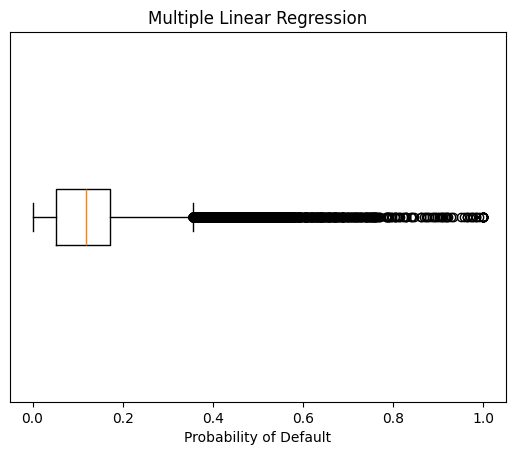

In [46]:
model1_pred_probabilities.loc[ model1_pred_probabilities > 1] = 1
model1_pred_probabilities.loc[ model1_pred_probabilities < 0] = 0

plt.boxplot(model1_pred_probabilities, vert = False)
plt.title('Multiple Linear Regression')
plt.xlabel('Probability of Default')
plt.yticks(visible=False)
plt.tick_params(left = False)
plt.show()

Model 2. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x2 = df.drop("default", axis=1)
y2 = df["default"]
x2_train, x2_test, y2_train, y2_test = train_test_split(StandardScaler().fit_transform(x2), y2, test_size = 0.2, stratify = y2, random_state = 10)
model2 = LogisticRegression()
model2.fit(x2_train, y2_train)
model2_pred = pd.Series(model2.predict(x2_test))


print("-------------------------TEST SCORES MODEL 2 LOGISTIC REGRESSION-----------------------") 
print(f"Recall: { round(recall_score(y2_test.values, model2_pred.values)*100, 2) }")
print(f"Precision: { round(precision_score(y2_test.values, model2_pred.values)*100, 2) }")
print(f"Accuracy score: { round(accuracy_score(y2_test.values, model2_pred.values)*100, 2) }")
print(f"F1-Score: { round(f1_score(y2_test.values, model2_pred.values)*100, 2) }")

-------------------------TEST SCORES MODEL 2 LOGISTIC REGRESSION-----------------------
Recall: 12.25
Precision: 67.17
Accuracy score: 88.52
F1-Score: 20.72


Model 3. Random Forest Classifier 

In [27]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

x3 = df.drop("default", axis=1)
y3 = df["default"]
x3_train, x3_test, y3_train, y3_test = train_test_split(StandardScaler().fit_transform(x3), y3, test_size = 0.2, stratify = y3, random_state = 9)

model3 = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
smote_sampler = SMOTE(random_state = 9)
model3_pipeline = Pipeline(steps = [['smote', smote_sampler], ['classifier', model3]])
model3_pipeline.fit(x3_train, y3_train)
model3_pred = pd.Series(model3_pipeline.predict(x3_test))

print("-------------------------TEST SCORES MODEL 3 RANDOM FOREST CLASSIFIER-----------------------") 
print(f"Recall: { round(recall_score(y3_test.values, model3_pred.values)*100, 2) }")
print(f"Precision: { round(precision_score(y3_test.values, model3_pred.values)*100, 2) }")
print(f"Accuracy score: { round(accuracy_score(y3_test.values, model3_pred.values)*100, 2) }")
print(f"F1-Score: { round(f1_score(y3_test.values, model3_pred.values)*100, 2) }")

-------------------------TEST SCORES MODEL 3 RANDOM FOREST CLASSIFIER-----------------------
Recall: 28.01
Precision: 45.63
Accuracy score: 87.09
F1-Score: 34.71


 Model 4. Multivariate Polynomial Regression

In [83]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4, include_bias=False)
model4 = LinearRegression()

x4 = df.drop("default", axis=1)
y4 = df["default"]
x4_train, x4_test, y4_train, y4_test = train_test_split(poly.fit_transform(x4), y4, test_size = 0.2, stratify = y4, random_state = 9)

model4.fit(x4_train, y4_train)
model4_pred = pd.Series(model4.predict(x4_test))

model4_pred_probabilities = model4_pred.copy()


model4_pred.loc[ model4_pred <= model4_pred_probabilities.quantile(0.75)] = 0
model4_pred.loc[ model4_pred > model4_pred_probabilities.quantile(0.75)] = 1

print("-------------------------TEST SCORES MODEL 4 MPR-----------------------") 
print(f"Recall: { round(recall_score(y4_test.values, model4_pred.values)*100, 2) }")
print(f"Precision: { round(precision_score(y4_test.values, model4_pred.values)*100, 2) }")
print(f"Accuracy score: { round(accuracy_score(y4_test.values, model4_pred.values)*100, 2) }")
print(f"F1-Score: { round(f1_score(y4_test.values, model4_pred.values)*100, 2) }")



-------------------------TEST SCORES MODEL 4 MPR-----------------------
Recall: 61.73
Precision: 30.24
Accuracy score: 77.87
F1-Score: 40.6


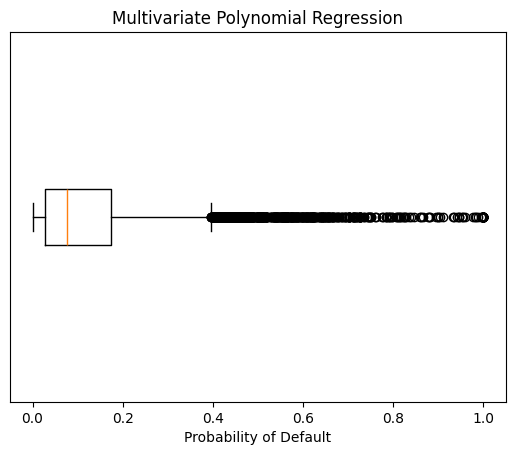

In [105]:
model4_pred_probabilities.loc[ model4_pred_probabilities > 1] = 1
model4_pred_probabilities.loc[ model4_pred_probabilities < 0] = 0

plt.boxplot(model4_pred_probabilities, vert = False)
plt.title('Multivariate Polynomial Regression')
plt.xlabel('Probability of Default')
plt.yticks(visible=False)
plt.tick_params(left = False)

quantiles = np.quantile(model4_pred_probabilities, np.array([0.25, 0.75]))

plt.show()

Customers vs Default Likelihood

In [108]:
highSeries = pd.Series(model4_pred_probabilities[model4_pred_probabilities > model4_pred_probabilities.quantile(0.75)])
lowSeries = pd.Series(model4_pred_probabilities[model4_pred_probabilities < model4_pred_probabilities.quantile(0.25)])

above50Series = pd.Series(model4_pred_probabilities[model4_pred_probabilities > 0.5])

LowProbability = str(round(model4_pred_probabilities.quantile(0.25)*100, 2))
MediumProbability = str(round(model4_pred_probabilities.quantile(0.5)*100, 2))
HighProbability = str(round(model4_pred_probabilities.quantile(0.75)*100, 2))

df2 = {'Below ' + LowProbability :len(lowSeries), LowProbability + ' - ' + HighProbability: 2 * len(highSeries), 'Above ' + HighProbability:len(highSeries) - len(above50Series), 'Above 50': len(above50Series)}


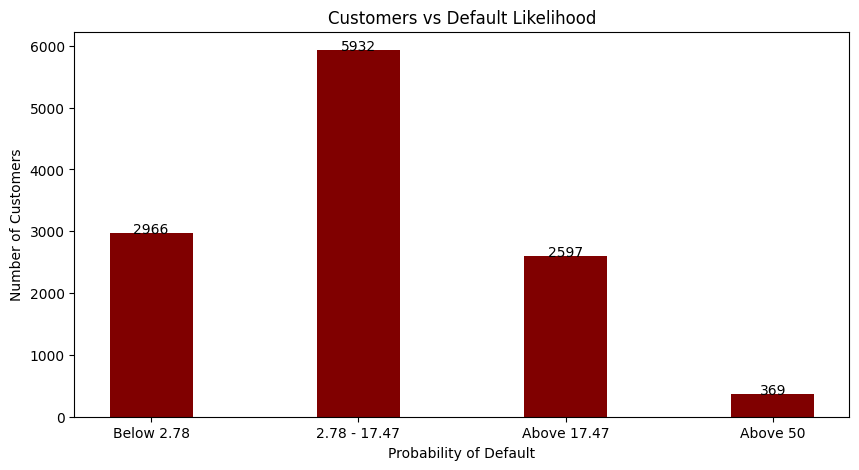

In [75]:
ProbabilityofDefault = list(df2.keys())
NumberofCustomers = list(df2.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(ProbabilityofDefault, NumberofCustomers, color ='maroon', width = 0.4)
 
plt.xlabel("Probability of Default")
plt.ylabel("Number of Customers")
plt.title("Customers vs Default Likelihood")

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
addlabels(ProbabilityofDefault,NumberofCustomers)
plt.show()

Model 5. Using multivariate polynomial regression to predict loan defaulting using only fico and dti.

In [82]:
poly2 = PolynomialFeatures(degree=4, include_bias=False)
model5 = LinearRegression()

x5 = df[["fico", "dti"]]
y5 = df["default"]
x5_train, x5_test, y5_train, y5_test = train_test_split(poly.fit_transform(x5), y5, test_size = 0.2, stratify = y5, random_state = 9)

model5.fit(x5_train, y5_train)
model5_pred = pd.Series(model5.predict(x5_test))

model5_pred_probabilities = model5_pred.copy()

model5_pred.loc[ model5_pred < model5_pred_probabilities.quantile(0.75)] = 0
model5_pred.loc[ model5_pred >= model5_pred_probabilities.quantile(0.75)] = 1

print("-------------------------TEST SCORES MODEL 5 FICO, DTI-----------------------") 
print(f"Recall: { round(recall_score(y5_test.values, model5_pred.values)*100, 2) }")
print(f"Precision: { round(precision_score(y5_test.values, model5_pred.values)*100, 2) }")
print(f"Accuracy score: { round(accuracy_score(y5_test.values, model5_pred.values)*100, 2) }")
print(f"F1-Score: { round(f1_score(y5_test.values, model5_pred.values)*100, 2) }")



-------------------------TEST SCORES MODEL 5 FICO, DTI-----------------------
Recall: 47.14
Precision: 23.1
Accuracy score: 74.3
F1-Score: 31.0
